In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np

In [63]:
# train = pd.read_csv("/home/user/Documents/MTP/CNN/emnist/emnist-bymerge-train.csv")
train = pd.read_csv("/home/user/Documents/MTP/CNN/emnist/emnist-letters-train.csv")
# test = pd.read_csv("/home/user/Documents/MTP/CNN/emnist/emnist-bymerge-test.csv")
test = pd.read_csv("/home/user/Documents/MTP/CNN/emnist/emnist-letters-test.csv")


In [169]:
train.iloc[1,].describe()

count    785.000000
mean      35.100637
std       78.700762
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 1, dtype: float64

In [64]:
def load_char_mappings(mapping_path):
    """
    load EMNIST character mappings. This maps a label to the correspondent byte value of the given character
    return: the dictionary of label mappings
    """
    mappings = {}
    with open(mapping_path) as f:
        for line in f:
            (key, val) = line.split()
            mappings[int(key)] = int(val)

    return mappings

In [65]:
x_test = []
def rotate(img):
    flipped = np.fliplr(img.reshape(28,28))
    return np.rot90(flipped).reshape(784,)
        
for i in range(len(x_test)):
    x_test[i] = rotate(x_test[i])

In [66]:
def rotate(img):
    flipped = np.fliplr(img.reshape(28,28))
    return np.rot90(flipped).reshape(784,)
        
for i in range(len(x_test)):
    x_train[i] = rotate(x_train[i])

In [72]:
num_classes = 27

In [73]:
y_train = train.iloc[:,0]
train.iloc[:,0].describe()
y_train = np_utils.to_categorical(y_train, num_classes)
print ("y_train:", y_train.shape)

y_train: (88799, 27)


In [74]:
x_train = train.iloc[:,1:]
x_train = x_train.astype('float32')
x_train /= 255
print ("x_train:",x_train.shape)

x_train: (88799, 784)


In [75]:
y_test = test.iloc[:,0]
y_test = np_utils.to_categorical(y_test, num_classes)
print ("y_test:", y_test.shape)

y_test: (14799, 27)


In [76]:
x_test = test.iloc[:,1:]
x_test = x_test.astype('float32')
x_test /= 255
print ("x_test:",x_test.shape)

x_test: (14799, 784)


In [77]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

In [78]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print(x_train.shape)
print(x_test.shape)

(88799, 28, 28, 1)
(14799, 28, 28, 1)


In [79]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [80]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=200, verbose=2)

Train on 88799 samples, validate on 14799 samples
Epoch 1/5
 - 33s - loss: 0.8112 - accuracy: 0.7602 - val_loss: 0.4890 - val_accuracy: 0.8446
Epoch 2/5
 - 23s - loss: 0.3835 - accuracy: 0.8785 - val_loss: 0.3683 - val_accuracy: 0.8820
Epoch 3/5
 - 23s - loss: 0.3074 - accuracy: 0.9021 - val_loss: 0.3425 - val_accuracy: 0.8886
Epoch 4/5
 - 23s - loss: 0.2649 - accuracy: 0.9136 - val_loss: 0.3001 - val_accuracy: 0.9033
Epoch 5/5
 - 23s - loss: 0.2355 - accuracy: 0.9216 - val_loss: 0.2918 - val_accuracy: 0.9046


In [81]:
model.save('my_model.h5')

In [82]:

print(x_test.shape)

(14799, 28, 28, 1)


In [83]:
def get_boundaries(image):
    start=end=0
    w,h = image.shape
    for i in range(w):
        row=image[i]
        if (np.count_nonzero(row)!=h):
            start=i;
            break;
        
    for j in range(w-1, start, -1):
        row=image[j]
        if (np.count_nonzero(row)!=h):
            end=j
            break;
            
    return [start, end]  

In [165]:
def draw_box(image_name):
    top,bottom=get_boundaries(image_name)
    top=top-10
    bottom=bottom+10
    left,right=get_boundaries(image_name.T)
    left=left-10
    right=right+10
    cropped = image_name[top: bottom, left: right]
    
    return (cropped)

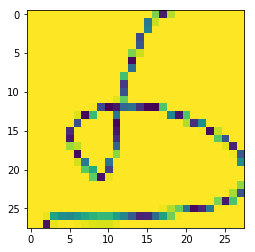

In [96]:
import cv2
import matplotlib.pyplot as plt


mytest = np.ndarray()


fname = "/home/user/Documents/MTP/CNN/images/" + str(i+1) + ".png"
img2=cv2.imread(fname,0)
img=draw_box(img2)
img = cv2.resize(img,(28,28))

    
    

In [89]:
img1 = np.reshape(img,(1,28,28,1))
img1 = img1.astype('float32')
img1.dtype

dtype('float32')

In [115]:
# model.predict(img1)
score = model.evaluate(x_test,y_test)
print(score[1])
x_test.shape

14799/14799 [==============================] - 1s 92us/step
0.9045881628990173


(14799, 28, 28, 1)

In [ ]:
# from subprocess import check_output
# print(check_output(["ls", "../working/"]).decode("utf8"))

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import numpy as np

In [ ]:
# c = x_test[89613]
# c = c.reshape(28,28)
# plt.gray()
# plt.imshow(c.reshape(28,28))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
3


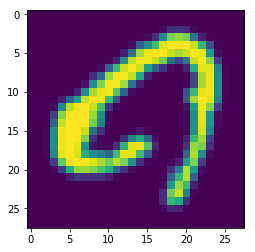

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
3


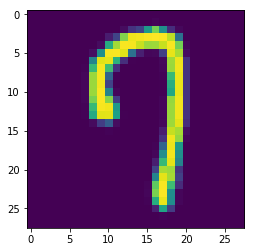

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
3


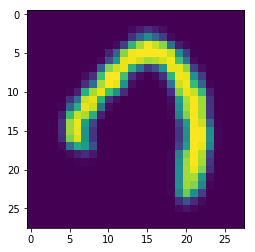

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
3


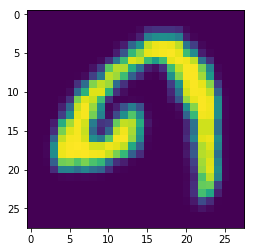

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
3


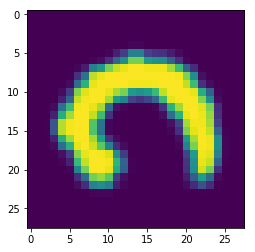

In [158]:
import matplotlib.pyplot as plt

for i in range(2000,2005):
    print(y_test[i])
    k = model.predict(x_test[i].reshape(1,28,28,1))
    print(np.argmax(k, axis=None, out=None))
    plt.imshow(np.reshape(x_test[i],(28,28)))
    plt.show()
    

17


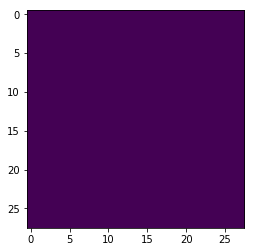

17


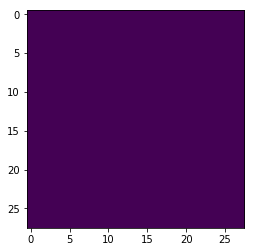

17


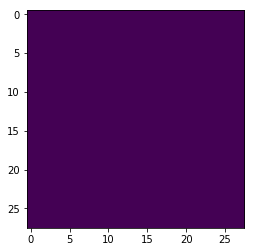

17


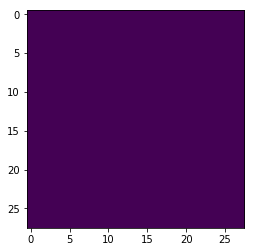

17


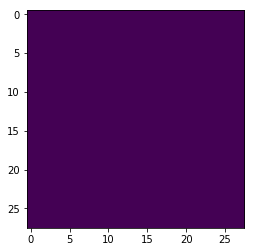

17


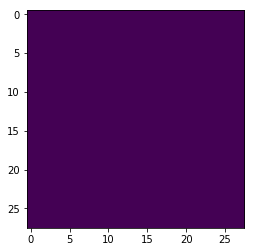

17


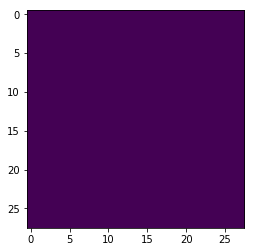

17


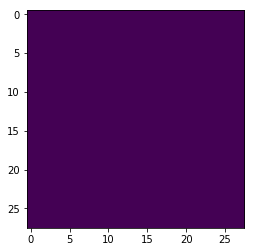

17


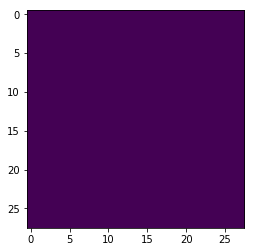

17


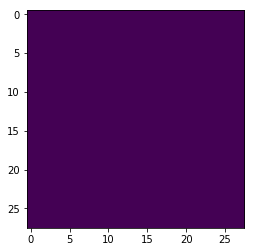

17


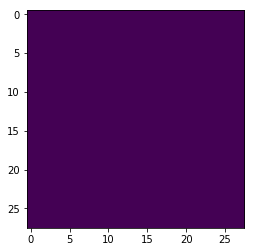

17


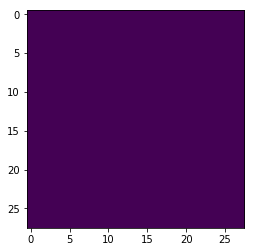

17


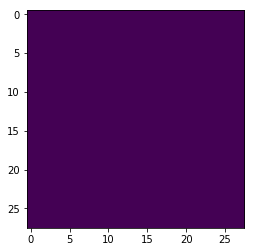

17


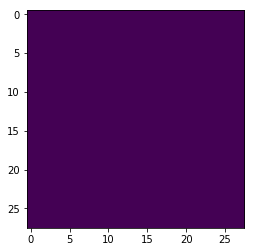

17


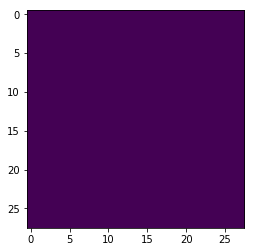

17


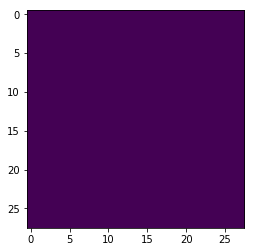

17


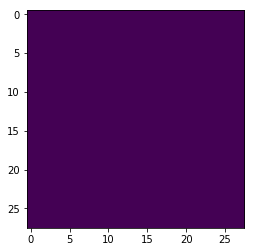

17


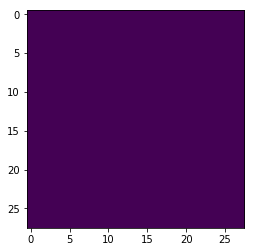

17


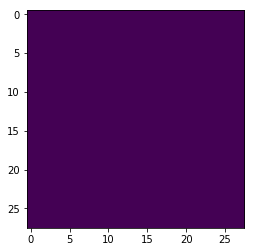

17


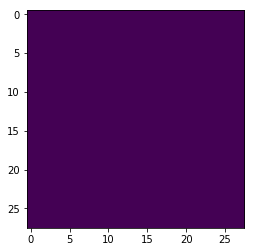

17


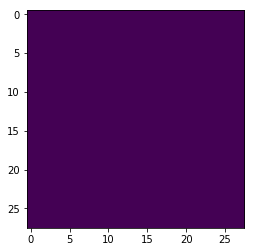

17


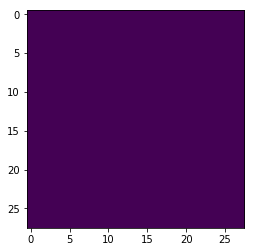

17


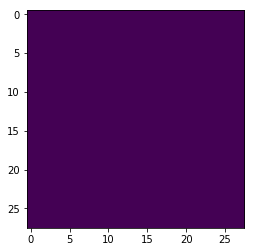

17


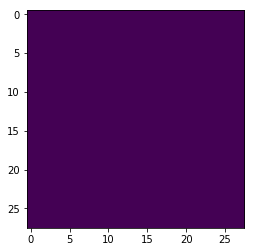

17


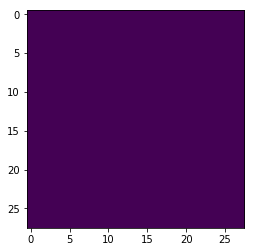

17


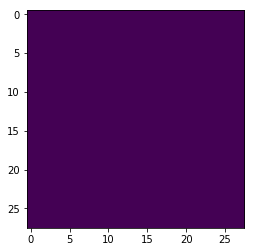

17


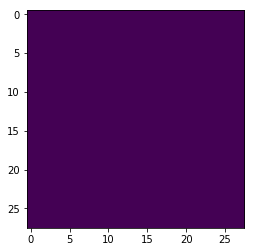

17


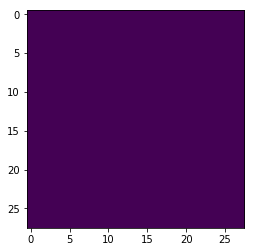

17


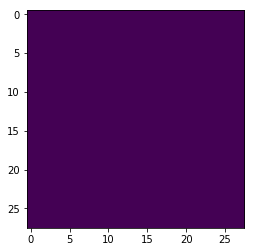

17


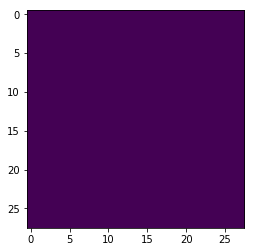

17


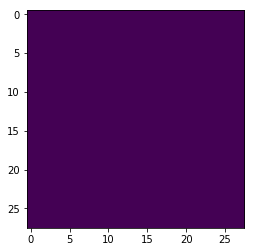

17


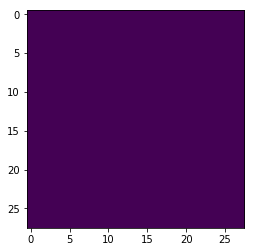

17


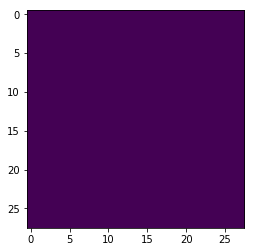

17


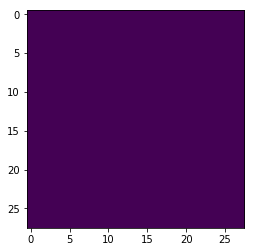

17


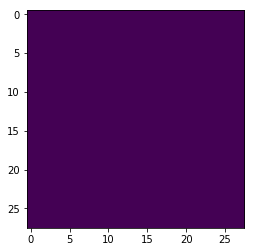

17


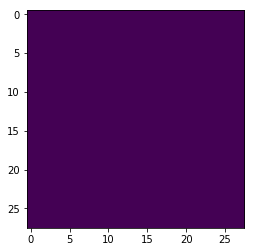

17


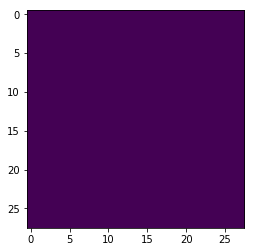

17


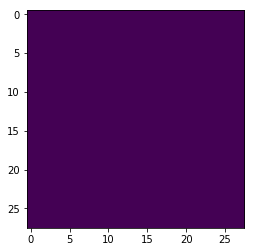

17


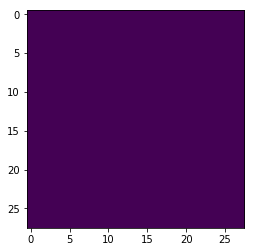

17


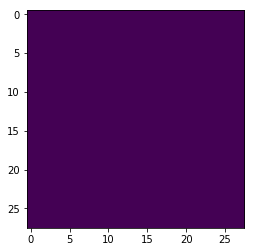

17


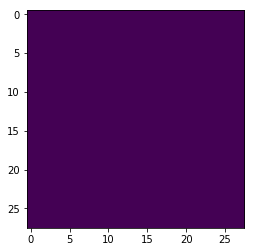

17


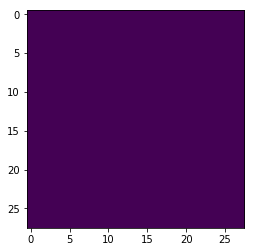

17


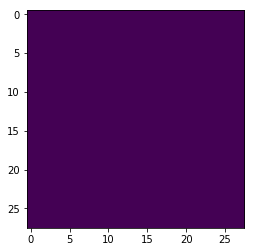

17


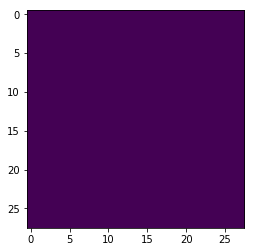

17


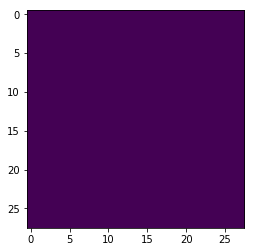

17


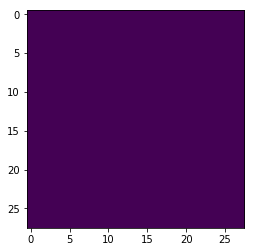

17


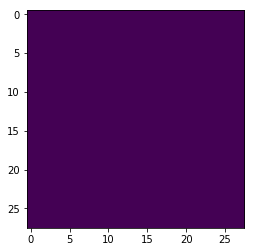

17


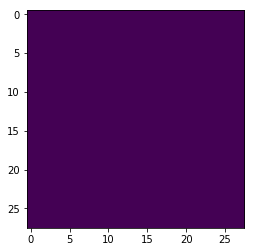

17


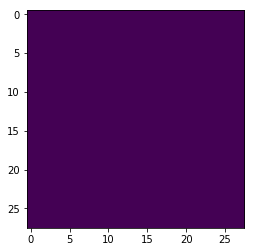

17


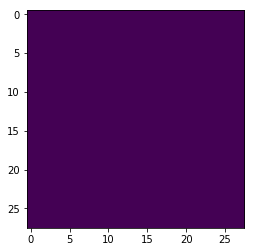

17


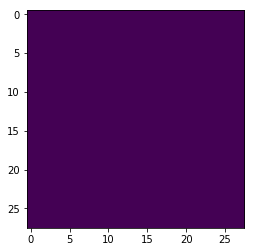

17


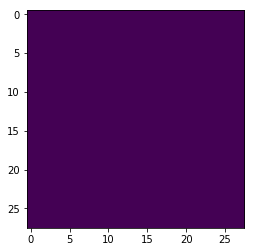

17


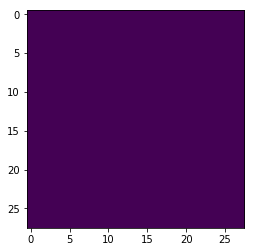

17


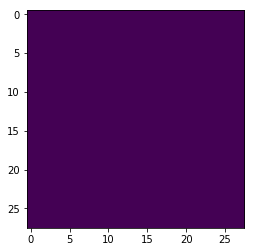

17


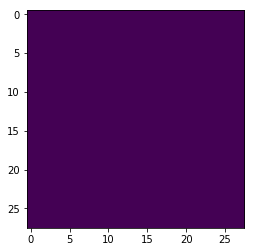

17


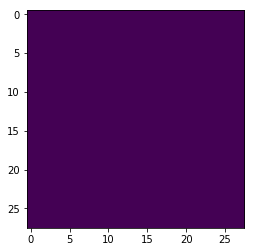

17


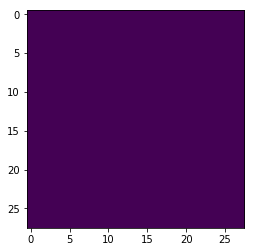

17


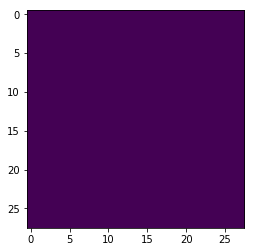

17


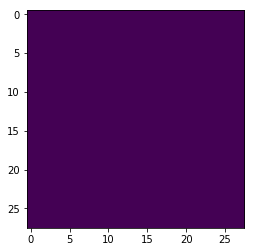

17


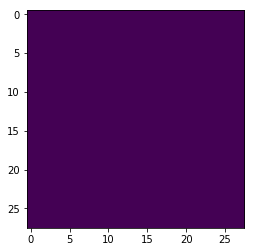

17


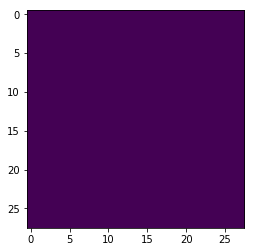

17


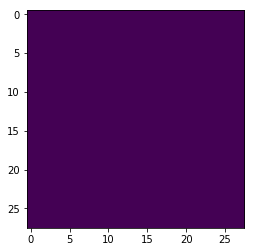

17


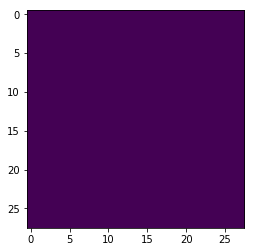

17


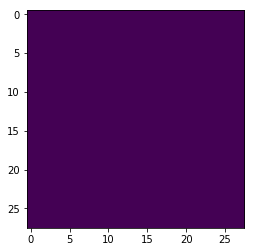

In [178]:


for i in range(1,65):
    fname = "/home/user/Documents/MTP/CNN/images/" + str(i) + ".png"
    img2=cv2.imread(fname,0)
    img=draw_box(img2)
    img=cv2.bitwise_not(img)
    img = cv2.resize(img,(28,28))
    img = rotate(img)
    img = img.astype('float32')
    img/=255
    k = model.predict(img.reshape(1,28,28,1))
    print(np.argmax(k, axis=None, out=None))
    plt.imshow(np.reshape(img,(28,28)))
    plt.show()
    